# Molecular filters

Molecular filters are predefined sets of conditions, used to remove unwanted molecules, e.g. too large ones. scikit-fingerprints implements many molecular filters, designed for different applications.

They are generally divided into two types, depending on what they use for defining filter conditions:
1. **Physicochemical properties** - define allowed numerical ranges of properties like molecular weight, formal charge, or number of rings. A molecule fulfills the filter condition and is kept if all its properties are contained in those ranges.
2. **Molecular substructures** - define unwanted substructures, functional groups, toxicity-inducing patterns etc. A molecule fulfills the filter condition and is kept if it does not contain any of the substructures.

Physicochemical properties filters can therefore be thought of as "inclusion" filters, and substructure filters as "exclusion" filters.

Let's see some examples of both.

## Physicochemical filters

Let's see a few examples of physicochemical filters:

1. **Molecular weight** ([docs](https://scikit-fingerprints.github.io/scikit-fingerprints/modules/generated/skfp.filters.MolecularWeightFilter.html#skfp.filters.MolecularWeightFilter)):
   - simply checks if a total molecular mass is inside a given range
   - by default, the range is $[0, 1000]$, corresponding roughly to most small molecules
2. **Lipinski Rule of 5** ([docs](https://scikit-fingerprints.github.io/scikit-fingerprints/modules/generated/skfp.filters.LipinskiFilter.html#skfp.filters.LipinskiFilter)):
   - one of the most famous molecular filters, checking for oral bioavailability
   - tries to select molecules that are small and lipophilic
   - by default, allows breaking one rule
   - molecular weight $\leq 500$
   - number of hydrogen bond acceptors (HBA) $\leq 10$
   - number of hydrogen bond donors (HBD) $\leq 5$
   - logP $\leq 5$
3. **Beyond Rule of 5** ([docs](https://scikit-fingerprints.github.io/scikit-fingerprints/modules/generated/skfp.filters.BeyondRo5Filter.html#skfp.filters.BeyondRo5Filter)):
   - designed to cover novel orally bioavailable drugs
   - less strict than Lipinski filter
   - molecular weight $\leq 1000$
   - logP in range $[−2, 10]$
   - HBA $\leq 15$
   - HBD $\leq 6$
   - topological polar surface area (TPSA) $\leq 250$
   - number of rotatable bonds $\leq 20$
4. **Rule of 3** ([docs](https://scikit-fingerprints.github.io/scikit-fingerprints/modules/generated/skfp.filters.RuleOfThreeFilter.html#skfp.filters.RuleOfThreeFilter)):
   - optimised to search for fragment-based lead-like compounds with desired properties
   - there is also an extended rule, including TPSA and rotatable bonds conditions
   - molecular weight $\leq 300$
   - HBA $\leq 3$
   - HBD $\leq 3$
   - logP $\leq 3$
   - extended rules: TPSA $\leq 60$, number of rotatable bonds $\leq 3$

All filters include the `allow_one_violation` argument. If True, molecules still pass the filter even if one of their physicochemical properties falls outside the defined range. Vast majority of filters have default value False for this parameter, except for Lipinski filter.

In [1]:
import pandas as pd
from rdkit import Chem

from skfp.filters import (
    BeyondRo5Filter,
    LipinskiFilter,
    MolecularWeightFilter,
    RuleOfThreeFilter,
)

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry> already registered; second conversion method ignored.


For starters, let us prepare some example data.

In [5]:
smiles = [
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # Aspirin
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",  # Caffeine
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)",  # Ibuprofen
    "C[C@H](CCC(=O)O)CC1=CC=CC=C1",  # Cholesterol
]

In [6]:
mw_filter = MolecularWeightFilter()
lipinski_filter = LipinskiFilter()
beyond_ro5_filter = BeyondRo5Filter()
ro3_filter = RuleOfThreeFilter()

In [7]:
mw_filtered_smiles = mw_filter.transform(smiles)
mw_filtered_smiles

['CC(=O)OC1=CC=CC=C1C(=O)O',
 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)',
 'C[C@H](CCC(=O)O)CC1=CC=CC=C1']

In [8]:
lipinski_filtered_smiles = lipinski_filter.transform(smiles)
lipinski_filtered_smiles

['CC(=O)OC1=CC=CC=C1C(=O)O',
 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)',
 'C[C@H](CCC(=O)O)CC1=CC=CC=C1']

In [9]:
beyond_ro5_filtered_smiles = beyond_ro5_filter.transform(smiles)
beyond_ro5_filtered_smiles

['CC(=O)OC1=CC=CC=C1C(=O)O',
 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)',
 'C[C@H](CCC(=O)O)CC1=CC=CC=C1']

In [10]:
ro3_filtered_smiles = ro3_filter.transform(smiles)
ro3_filtered_smiles

['CC(=O)OC1=CC=CC=C1C(=O)O', 'C[C@H](CCC(=O)O)CC1=CC=CC=C1']

By default, filters return a subset of molecules. Alternatively, by setting `return_indicators=True`, they can return a vector of booleans, with True value corresponding to molecules fulfilling the filter rules. This allows more sophisticated analyzes of results, e.g. by saving the results in a dataframe.

In [14]:
mw_mask = MolecularWeightFilter(return_indicators=True)
lipinski_mask = LipinskiFilter(return_indicators=True)
beyond_ro5_mask = BeyondRo5Filter(return_indicators=True)
ro3_mask = RuleOfThreeFilter(return_indicators=True)

In [15]:
data = [
    {"name": "Aspirin", "smiles": "CC(=O)OC1=CC=CC=C1C(=O)O"},
    {"name": "Caffeine", "smiles": "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"},
    {"name": "Ibuprofen", "smiles": "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"},
    {"name": "Cholesterol", "smiles": "C[C@H](CCC(=O)O)CC1=CC=CC=C1"},
    {"name": "Glucose", "smiles": "C(C1C(C(C(C(O1)O)O)O)O)O"},
]

df = pd.DataFrame(data)

In [16]:
df["mw_filter_pass"] = mw_mask.transform(df["smiles"])
df["lipinski_filter_pass"] = lipinski_mask.transform(df["smiles"])
df["beyond_rule_of_5_pass"] = beyond_ro5_mask.transform(df["smiles"])
df["rule_of_3_pass"] = ro3_mask.transform(df["smiles"])

In [17]:
df

,name,smiles,mw_filter_pass,lipinski_filter_pass,beyond_rule_of_5_pass,rule_of_3_pass
0,Aspirin,CC(=O)OC1=CC=CC=C1C(=O)O,True,True,True,True
1,Caffeine,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,True,True,True,False
2,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,True,True,True,False
3,Cholesterol,C[C@H](CCC(=O)O)CC1=CC=CC=C1,True,True,True,True
4,Glucose,C(C1C(C(C(C(O1)O)O)O)O)O,True,True,False,False


## Substructural filters

Substructural filters use sets of SMARTS patterns to define unwanted substructures. An example is Brenk filter ([docs](https://scikit-fingerprints.github.io/scikit-fingerprints/modules/generated/skfp.filters.BrenkFilter.html)), designed to filter out molecules containing substructures with undesirable pharmacokinetics or toxicity, e.g. sulfates, phosphates, nitro groups. Other filters from this group often work based on similar principles, but differing in how aggressively they filter the molecules.

In [84]:
from skfp.filters import BrenkFilter

brenk_filter = BrenkFilter()

['description', 'FilterSet', 'Reference', 'Scope']

Patterns are saved in `._filters` attribute of the filter object. They are represented using RDKit `FilterCatalog` objects, which are quite efficient in checking the patterns, but make it challenging to inspect SMARTS patterns from Python. The first few patterns from BRENK and their meanings are:

In [85]:
patterns = [
    (">_2_ester_groups", "C(=O)O[C,H1].C(=O)O[C,H1].C(=O)O[C,H1]"),
    ("2-halo_pyridine", "n1c([F,Cl,Br,I])cccc1"),
    ("acid_halide", "C(=O)[Cl,Br,I,F]"),
    ("acyclic_C=C-O", "C=[C!r]O"),
    ("acyl_cyanide", "N#CC(=O)"),
    ("acyl_hydrazine", "C(=O)N[NH2]"),
    ("aldehyde", "[CH1](=O)"),
    ("Aliphatic_long_chain", "[R0;D2][R0;D2][R0;D2][R0;D2]"),
]

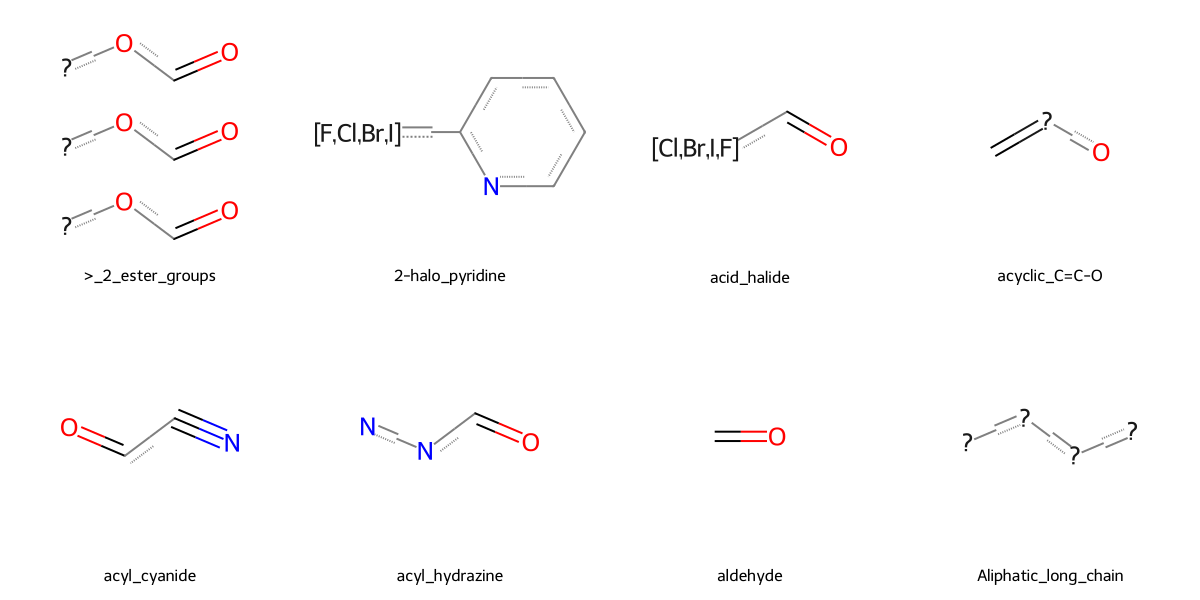

In [86]:
from rdkit.Chem import Draw

mols = []
titles = []

for name, smarts in patterns:
    mol = Chem.MolFromSmarts(smarts)
    if mol is not None:
        mols.append(mol)
        titles.append(name)

img = Draw.MolsToGridImage(mols, legends=titles, molsPerRow=4, subImgSize=(300, 300))
img

Let's focus on aldehydes. One of the simplest aldehydes is acrolein. Let's see its structural formula.

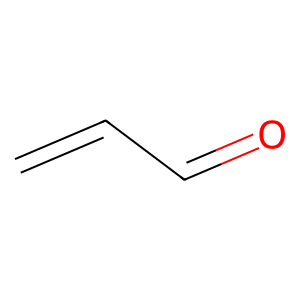

In [100]:
acrolein_smiles = "C=CC=O"

mol = Chem.MolFromSmiles(acrolein_smiles)
img = Draw.MolToImage(mol, size=(300, 300))
img

Obviously, it has a carbonyl group, which is characteristic of aldehydes. Thus, it should be filtered out by the Brenk filter.

In [101]:
brenk_filter = BrenkFilter()
smiles = [acrolein_smiles]

filtered_smiles = brenk_filter.fit_transform(smiles)
filtered_smiles

[]

## Custom filters

By inheriting from `BaseFilter`, you can create your own molecular filters. The main element is the `_apply_mol_filter` method, which should return True if a molecule fulfills the filter rules and should be kept, or False otherwise.

Let's create a simple physicochemical filter, which will keep molecules below `max_weight` and having at most `num_heavy_atoms` heavy atoms. This is a slightly simplified example, without fully-featured parameter validation - see [scikit-learn code](https://github.com/scikit-learn/scikit-learn/blob/687e84a126965b4179b02d86041a9e997eba87c9/sklearn/utils/_param_validation.py#L27) if you want to learn more about that.

Further, all filters have arguments:
- `allow_one_violation` - if you want to tolerate a single violation
- `return_indicators` - whether to return molecules or a boolean mask
- `n_jobs` - how many processes to use for filtering in parallel
- `batch_size` - for finer control over batch size for parallelism
- `verbose` - controls verbosity of TQDM progress bar

You can omit those arguments, but it will also disable some of the functionalities that you can expect from scikit-fingerprints filters.

In [100]:
from rdkit.Chem import Mol
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.rdMolDescriptors import CalcNumHeavyAtoms

from skfp.bases.base_filter import BaseFilter


class CustomMolecularFilter(BaseFilter):
    def __init__(
        self,
        max_weight: int = 250,
        num_heavy_atoms: int = 50,
        allow_one_violation: bool = False,
        return_indicators: bool = False,
        n_jobs: int | None = None,
        batch_size: int | None = None,
        verbose: int | dict = 0,
    ):
        super().__init__(
            allow_one_violation=allow_one_violation,
            return_indicators=return_indicators,
            n_jobs=n_jobs,
            batch_size=batch_size,
            verbose=verbose,
        )
        # create attributes from custom parameters
        self.max_weight = max_weight
        self.num_heavy_atoms = num_heavy_atoms

    def _apply_mol_filter(self, mol: Mol) -> bool:
        # define the filter rules and check them
        rules = [
            MolWt(mol) <= self.max_weight,
            CalcNumHeavyAtoms(mol) <= self.num_heavy_atoms,
        ]

        # calculate how many rules have passed
        passed_rules = sum(rules)

        # check final filter status
        if self.allow_one_violation:
            return passed_rules >= len(rules) - 1
        else:
            return passed_rules == len(rules)

In [101]:
smiles = [
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # Aspirin
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",  # Caffeine
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)",  # Ibuprofen
    "C[C@H](CCC(=O)O)CC1=CC=CC=C1",  # Cholesterol
]

In [102]:
custom_filter = CustomMolecularFilter(verbose=True)

In [103]:
custom_filtered_smiles = custom_filter.fit_transform(smiles)
custom_filtered_smiles

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 22919.69it/s]


['CC(=O)OC1=CC=CC=C1C(=O)O',
 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)',
 'C[C@H](CCC(=O)O)CC1=CC=CC=C1']